In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC as svc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


2022-08-05 16:27:12.033007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 16:27:12.033051: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

#My computer just crashed, sorry!
#np. Anthony is explaining scatter plots right now.

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [5]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree \(Emma\)
- Random Forest
- NEURAL NETWORKS  Thomas
- 
- Logistic Regression
- 
- Naive Bayes \(Jeffrey and Rhone\)
- Adaboost
- Support vector classifier
- 
- 
- Support vector classifier 
- KNN

<u>**AlSO TRY OPTIMIZING THEM**</u>

Grid Search CV

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [6]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [7]:
target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.3)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [19]:
import pickle

model = RFC()
model.fit(x_train, y_train)
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

{'accuracy': 0.8586956521739131, 'precision': 0.8726114649681529, 'recall': 0.8782051282051282, 'f1_score': 0.8753993610223643}


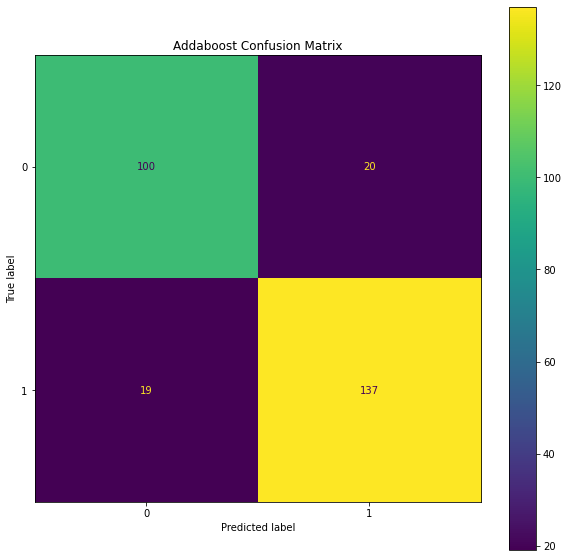

In [31]:
#ADABOOST
# parameters = {'n_estimators':[50, 100, 125, 150], 'learning_rate': [0.01, 0.1, 0.3, 0.5]}
# scoring = ['precision', 'accuracy', 'recall', 'f1']


# for score in scoring:
#     abc = AdaBoostClassifier()
#     grid_abc = GridSearchCV(abc, parameters, scoring=score)
#     grid_abc.fit(x_train, y_train)


#     print("best params for %s: " % score)
#     print(grid_abc.best_params_)

#     means = grid_abc.cv_results_["mean_test_score"]

#     print("mean scores")
#     for mean, params in zip(means, grid_abc.cv_results_["params"]):
#         print("%0.5f for %r" % (mean, params))

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada.fit(x_train, y_train)

y_predictions = ada.predict(x_test)

total_squared_error = (np.sum((y_test - y_predictions)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
#print(mean_squared_error)


# sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='g')
acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)
scores['Adaboost'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['Adaboost'])



{'accuracy': 0.8586956521739131, 'precision': 0.8407643312101911, 'recall': 0.9041095890410958, 'f1_score': 0.8712871287128713}


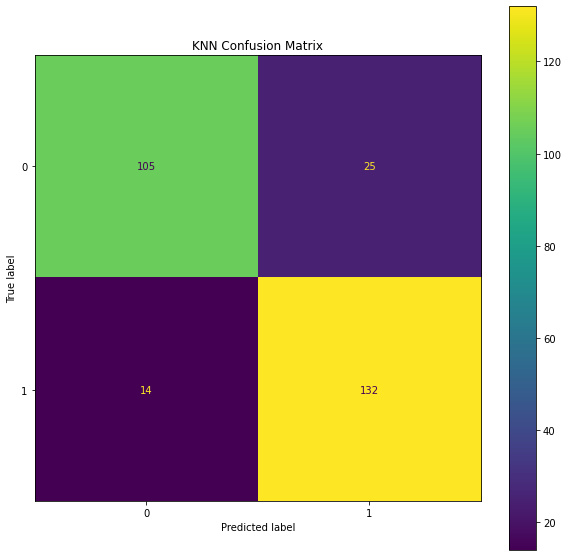

In [21]:

knn = KNN()
knn.fit(x_train, y_train)
y_predictions = knn.predict(x_test)

acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['knn'])
title = "KNN Confusion Matrix"
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_predictions, labels=abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abc.classes_)
disp.plot(ax=ax)
disp.ax_.set_title(title)
fig.savefig("confusion_matrices/knn.jpg")

In [13]:
param_grid = {'n_neighbors': range(1, 400)}

x = KNN()
grid_x = GridSearchCV(x, param_grid)
grid_x.fit(x_train, y_train)
print(grid_x.best_params_)

best_knn = grid_x.best_estimator_
y_predictions = best_knn.predict(x_test)

acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)
scores['knn_grid'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['knn_grid'])

{'n_neighbors': 47}
{'accuracy': 0.8623188405797102, 'precision': 0.8866666666666667, 'recall': 0.8636363636363636, 'f1_score': 0.875}


{'accuracy': 0.8405797101449275, 'precision': 0.84, 'recall': 0.863013698630137, 'f1_score': 0.8513513513513513}


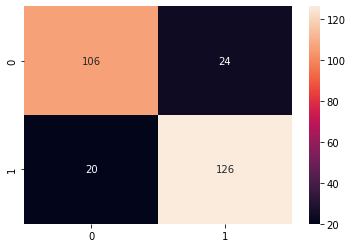

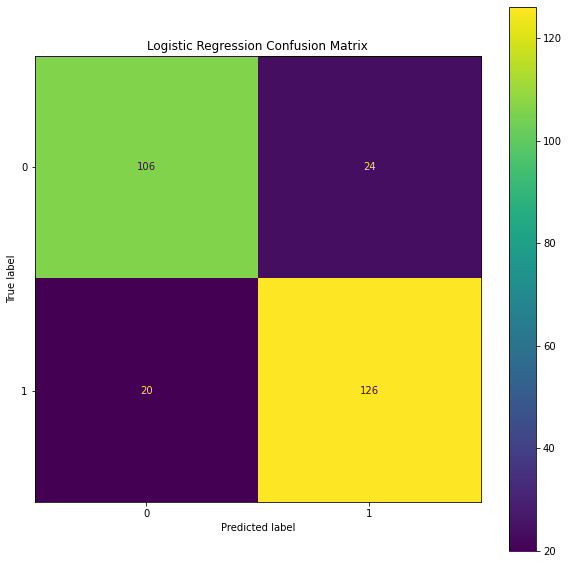

In [17]:
#x is everything but heart disease
lr_clf = LogisticRegression(random_state=42)
#Fits dataset
lr_clf.fit(x_train, y_train)
#gets predicted values
y_pred= lr_clf.predict(x_test)
#compares predictions to actual values
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# fig = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g').get_figure()
# fig.savefig("lr_cm.png") 

title = "Logistic Regression Confusion Matrix"
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred, labels=abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abc.classes_)
disp.plot(ax=ax)
disp.ax_.set_title(title)
fig.savefig("confusion_matrices/lr.jpg")

scores['LOGISTICREGRESSION'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['LOGISTICREGRESSION'])



In [17]:
scores.keys()

dict_keys(['metrics', 'Adaboost', 'knn_grid', 'knn', 'LOGISTICREGRESSION'])

[0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0]
[1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0

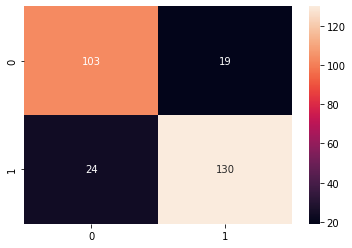

In [18]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [7]:
# #x is everything but heart disease
# x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
# #y is heart disease
# y = heart_df['HeartDisease']
# # splits dataset; 80 percent train: 20 percent test
# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
# #scales down the x values
# st_x= StandardScaler()
# x_train= st_x.fit_transform(x_train)
# x_test= st_x.transform(x_test)
# classifier = LogisticRegression(random_state=0)
# #Fits dataset
# classifier.fit(x_train, y_train)
# #gets predicted values
# y_pred= classifier.predict(x_test)
# #compares predictions to actual values
# cm= confusion_matrix(y_pred, y_test)
# print(cm)
# """total_squared_error = (np.sum((y_test - y_pred)**2))
# mean_squared_error = total_squared_error/len(y_test)
# print(mean_squared_error)"""
# """x_set, y_set = x_train, y_train  
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
# np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
# plt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
# alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
# plt.xlim(x1.min(), x1.max())  
# plt.ylim(x2.min(), x2.max())  
# for i, j in enumerate(np.unique(y_set)):  
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
#         c = ListedColormap(('purple', 'green'))(i), label = j)  
# plt.title('Logistic Regression (Training set)')  
# plt.xlabel('Age')  
# plt.ylabel('Estimated Salary')  
# plt.legend()  
# plt.show()""" 

[[60 11]
 [17 96]]


"x_set, y_set = x_train, y_train  \nx1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  \nnp.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  \nplt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  \nalpha = 0.75, cmap = ListedColormap(('purple','green' )))  \nplt.xlim(x1.min(), x1.max())  \nplt.ylim(x2.min(), x2.max())  \nfor i, j in enumerate(np.unique(y_set)):  \n    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  \n        c = ListedColormap(('purple', 'green'))(i), label = j)  \nplt.title('Logistic Regression (Training set)')  \nplt.xlabel('Age')  \nplt.ylabel('Estimated Salary')  \nplt.legend()  \nplt.show()"

(642, 11)


2022-08-03 15:52:17.399972: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 15:52:17.400025: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 15:52:17.400050: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (754e23c69b95): /proc/driver/nvidia/version does not exist
2022-08-03 15:52:17.401686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/9 [==>...........................] - ETA: 0s

9/9 [==============================] - 0s 2ms/step


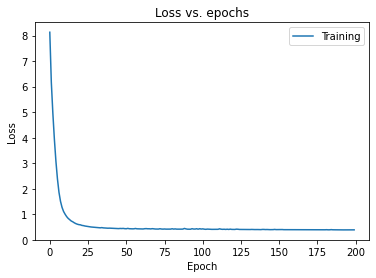

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0]
[1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 0 0 1 0 0 1 1 1 1 

1/9 [==>...........................] - ETA: 1s - loss: 0.4982 - accuracy: 0.8125

9/9 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8514


In [19]:
import copy
print(x_train.shape)
# ss=StandardScaler()
# x_train=ss.fit_transform(x_train)
# x_test=ss.fit_transform(x_test)
CNN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,1)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    tf.keras.layers.Dense(10)
])
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_history = CNN.fit(x_train, y_train, epochs=200, verbose = False)
prediction = CNN.predict(x_test)
y_hat = []
for i in range(0,len(prediction)):
    prediction[i] = np.argmax(prediction[i])
for i in range(0,len(prediction)):
    y_hat.append(int(prediction[i][0]))
plt.plot(CNN_history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
print(y_hat)
print(np.array(y_test))
test_loss, test_acc = CNN.evaluate(x_test,  y_test)

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_5 (Dense)             (None, 145)               1740      


 dense_6 (Dense)             (None, 120)               17520     


 dense_7 (Dense)             (None, 70)                8470      


 dense_8 (Dense)             (None, 50)                3550      


 dense_9 (Dense)             (None, 1)                 51        


Total params: 31,331


Trainable params: 31,331


Non-trainable params: 0


_________________________________________________________________


Epoch 1/25


1/9 [==>...........................] - ETA: 5s - loss: 8.0585 - accuracy: 0.4545

9/9 [==============================] - 1s 27ms/step - loss: 7.7387 - accuracy: 0.6459 - val_loss: 7.2772 - val_accuracy: 0.8238


Epoch 2/25


1/9 [==>...........................] - ETA: 0s - loss: 7.2677 - accuracy: 0.8182

9/9 [==============================] - ETA: 0s - loss: 6.9719 - accuracy: 0.8374

9/9 [==============================] - 0s 21ms/step - loss: 6.9719 - accuracy: 0.8374 - val_loss: 6.5491 - val_accuracy: 0.8187


Epoch 3/25


1/9 [==>...........................] - ETA: 0s - loss: 6.5284 - accuracy: 0.9091

9/9 [==============================] - 0s 10ms/step - loss: 6.2446 - accuracy: 0.8396 - val_loss: 5.8675 - val_accuracy: 0.8187


Epoch 4/25


1/9 [==>...........................] - ETA: 0s - loss: 5.8108 - accuracy: 0.8364

9/9 [==============================] - 0s 7ms/step - loss: 5.5604 - accuracy: 0.8463 - val_loss: 5.2417 - val_accuracy: 0.8290


Epoch 5/25


1/9 [==>...........................] - ETA: 0s - loss: 5.2982 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 4.9405 - accuracy: 0.8664 - val_loss: 4.6822 - val_accuracy: 0.8290


Epoch 6/25


1/9 [==>...........................] - ETA: 0s - loss: 4.5741 - accuracy: 0.8545

9/9 [==============================] - 0s 6ms/step - loss: 4.3868 - accuracy: 0.8753 - val_loss: 4.1639 - val_accuracy: 0.8342


Epoch 7/25


1/9 [==>...........................] - ETA: 0s - loss: 3.9896 - accuracy: 0.9091

9/9 [==============================] - 0s 6ms/step - loss: 3.8743 - accuracy: 0.8820 - val_loss: 3.6758 - val_accuracy: 0.8290


Epoch 8/25


1/9 [==>...........................] - ETA: 0s - loss: 3.6217 - accuracy: 0.8545

9/9 [==============================] - 0s 6ms/step - loss: 3.4056 - accuracy: 0.8842 - val_loss: 3.2241 - val_accuracy: 0.8290


Epoch 9/25


1/9 [==>...........................] - ETA: 0s - loss: 3.0596 - accuracy: 0.9273

9/9 [==============================] - 0s 8ms/step - loss: 2.9735 - accuracy: 0.8864 - val_loss: 2.8211 - val_accuracy: 0.8290


Epoch 10/25


1/9 [==>...........................] - ETA: 0s - loss: 2.7358 - accuracy: 0.8909

9/9 [==============================] - 0s 6ms/step - loss: 2.5826 - accuracy: 0.8864 - val_loss: 2.4518 - val_accuracy: 0.8290


Epoch 11/25


1/9 [==>...........................] - ETA: 0s - loss: 2.3301 - accuracy: 0.9091

9/9 [==============================] - 0s 7ms/step - loss: 2.2276 - accuracy: 0.8886 - val_loss: 2.1208 - val_accuracy: 0.8342


Epoch 12/25


1/9 [==>...........................] - ETA: 0s - loss: 2.0324 - accuracy: 0.9091

9/9 [==============================] - 0s 9ms/step - loss: 1.9117 - accuracy: 0.8842 - val_loss: 1.8280 - val_accuracy: 0.8394


Epoch 13/25


1/9 [==>...........................] - ETA: 0s - loss: 1.7141 - accuracy: 0.9091

9/9 [==============================] - 0s 6ms/step - loss: 1.6303 - accuracy: 0.8842 - val_loss: 1.5746 - val_accuracy: 0.8394


Epoch 14/25


1/9 [==>...........................] - ETA: 0s - loss: 1.5234 - accuracy: 0.8727

9/9 [==============================] - 0s 7ms/step - loss: 1.3919 - accuracy: 0.8909 - val_loss: 1.3622 - val_accuracy: 0.8394


Epoch 15/25


1/9 [==>...........................] - ETA: 0s - loss: 1.1757 - accuracy: 0.9091

9/9 [==============================] - 0s 8ms/step - loss: 1.1862 - accuracy: 0.8886 - val_loss: 1.1734 - val_accuracy: 0.8394


Epoch 16/25


1/9 [==>...........................] - ETA: 0s - loss: 1.0819 - accuracy: 0.8727

9/9 [==============================] - 0s 7ms/step - loss: 1.0200 - accuracy: 0.8842 - val_loss: 1.0337 - val_accuracy: 0.8394


Epoch 17/25


1/9 [==>...........................] - ETA: 0s - loss: 0.8696 - accuracy: 0.9273

9/9 [==============================] - 0s 8ms/step - loss: 0.8888 - accuracy: 0.8864 - val_loss: 0.9265 - val_accuracy: 0.8394


Epoch 18/25


1/9 [==>...........................] - ETA: 0s - loss: 0.7238 - accuracy: 0.9455

9/9 [==============================] - 0s 6ms/step - loss: 0.7899 - accuracy: 0.8909 - val_loss: 0.8441 - val_accuracy: 0.8446


Epoch 19/25


1/9 [==>...........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.9091

9/9 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.8909 - val_loss: 0.7839 - val_accuracy: 0.8446


Epoch 20/25


1/9 [==>...........................] - ETA: 0s - loss: 0.7452 - accuracy: 0.8545

9/9 [==============================] - 0s 8ms/step - loss: 0.6579 - accuracy: 0.8931 - val_loss: 0.7408 - val_accuracy: 0.8342


Epoch 21/25


1/9 [==>...........................] - ETA: 0s - loss: 0.5914 - accuracy: 0.9091

9/9 [==============================] - 0s 7ms/step - loss: 0.6139 - accuracy: 0.8931 - val_loss: 0.6971 - val_accuracy: 0.8446


Epoch 22/25


1/9 [==>...........................] - ETA: 0s - loss: 0.6000 - accuracy: 0.8909

9/9 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.8976 - val_loss: 0.6721 - val_accuracy: 0.8446


Epoch 23/25


1/9 [==>...........................] - ETA: 0s - loss: 0.6697 - accuracy: 0.8364

9/9 [==============================] - 0s 7ms/step - loss: 0.5555 - accuracy: 0.8976 - val_loss: 0.6498 - val_accuracy: 0.8497


Epoch 24/25


1/9 [==>...........................] - ETA: 0s - loss: 0.5296 - accuracy: 0.8727

9/9 [==============================] - 0s 8ms/step - loss: 0.5315 - accuracy: 0.8998 - val_loss: 0.6335 - val_accuracy: 0.8446


Epoch 25/25


1/9 [==>...........................] - ETA: 0s - loss: 0.4820 - accuracy: 0.9091

9/9 [==============================] - 0s 15ms/step - loss: 0.5141 - accuracy: 0.8998 - val_loss: 0.6148 - val_accuracy: 0.8497


1/9 [==>...........................] - ETA: 0s

9/9 [==============================] - 0s 2ms/step


1/9 [==>...........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.9375

9/9 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.8478


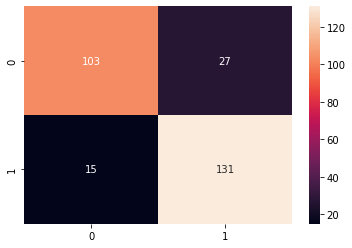

In [18]:
# ss=StandardScaler()
# x_train=ss.fit_transform(x_train)
# x_test=ss.fit_transform(x_test)
CNN2 = tf.keras.Sequential()
CNN2.add(tf.keras.layers.Dense(units=145,activation="relu",input_dim=11))
CNN2.add(tf.keras.layers.Dense(units=120,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=70,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=50,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
CNN2.summary()
CNN2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
CNN2_his=CNN2.fit(x_train,y_train,validation_split=0.30, batch_size=55,epochs=25)
y_pred=CNN2.predict(x_test)
y_pred = (y_pred > 0.5)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
test_loss, test_acc = CNN2.evaluate(x_test,  y_test)

A neural network works through different layers. There is 1 input layer, 1 output layer, and a custom amount of hidden layers. The different nodes in the hidden layers are supposed to simulate how brains work. Basically, each node is a combination of the inputs in some way. My neural network also works with a validation split, which are a part of the training split. They make sure that the model is moving in the right direction when training. This neural network has 3 hidden layers with a 0.88 accuracy rating.


0.8478260869565217 0.8291139240506329 0.8972602739726028 0.8618421052631579
{'accuracy': 0.8478260869565217, 'precision': 0.8291139240506329, 'recall': 0.8972602739726028, 'f1_score': 0.8618421052631579}


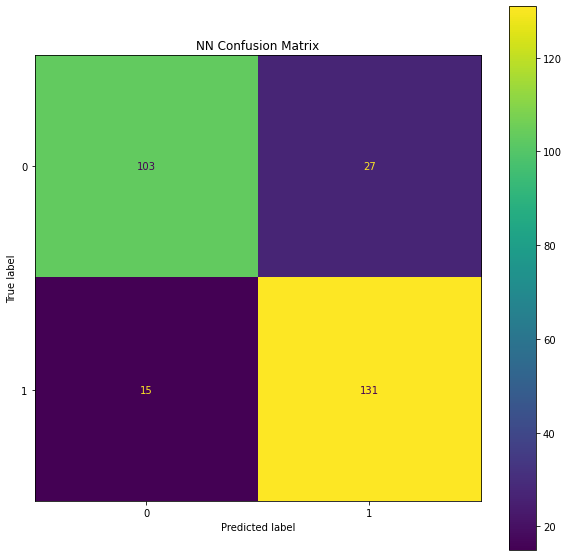

In [20]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc, prec, recall, f1)
scores['CNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['CNN'])

title = "NN Confusion Matrix"
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred, labels=abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abc.classes_)
disp.plot(ax=ax)
disp.ax_.set_title(title)
fig.savefig("confusion_matrices/nn.jpg")

In [44]:
tree_model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 21)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=21)

In [45]:
y_hat = tree_model.predict(x_test)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1])

In [47]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.14130434782608695


0.8586956521739131 0.8611111111111112 0.8942307692307693 0.8773584905660378
{'accuracy': 0.8586956521739131, 'precision': 0.8611111111111112, 'recall': 0.8942307692307693, 'f1_score': 0.8773584905660378}


{'accuracy': 0.8623188405797102, 'precision': 0.8766233766233766, 'recall': 0.8766233766233766, 'f1_score': 0.8766233766233766}


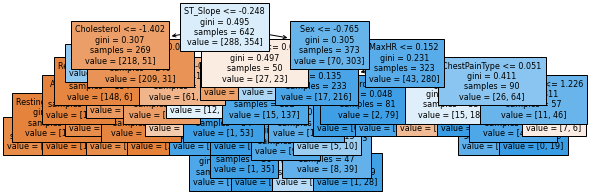

In [22]:
tree_model = tree.DecisionTreeClassifier(max_depth = 54, min_samples_split = 33, min_samples_leaf= 11)
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)
fig = plt.figure(figsize=(10,3))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=8)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['DTC_GRID'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['DTC_GRID'])




{'accuracy': 0.8152173913043478, 'precision': 0.8601398601398601, 'recall': 0.7987012987012987, 'f1_score': 0.8282828282828283}


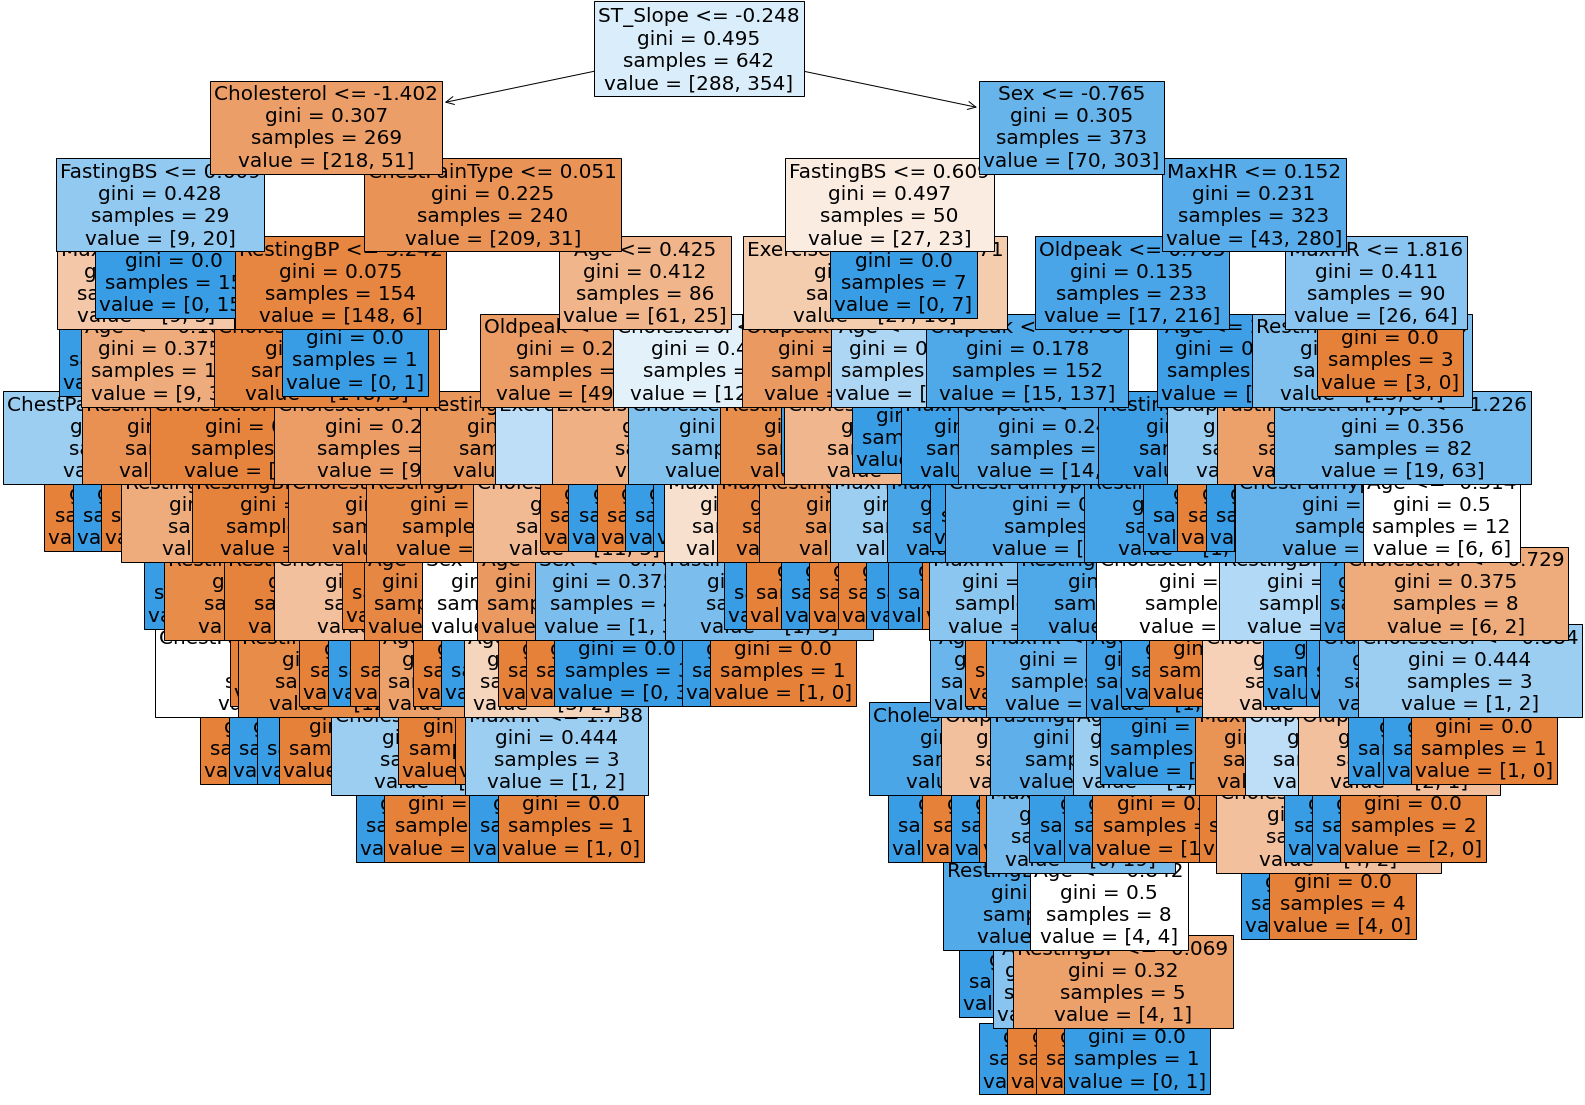

In [23]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=20)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['DTC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['DTC'])




<AxesSubplot:>

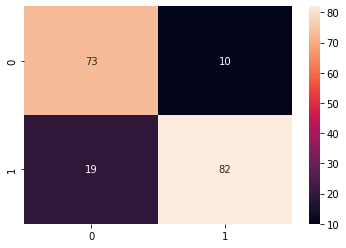

In [127]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

A decision tree classifier model classifies data as it passes through the nodes in the tree and uses the gini index to determine where to split. In order to optimize the decision tree, I used cv and randomized cv to find the best hyperparameters. It has a max depth of 54, minimum samples split of 33, minimum samples leaf of 11, and accuracy of 0.84. 


In [26]:
scores.keys()

dict_keys(['metrics', 'Adaboost', 'knn_grid', 'knn', 'LOGISTICREGRESSION', 'mlp', 'CNN', 'DTC_GRID', 'DTC'])

In [27]:
param_grid = {'max_depth': range(1,160), 'min_samples_split': range(2, 160), 'min_samples_leaf': range(1, 160)}
gs = RandomizedSearchCV(DecisionTreeClassifier(),param_grid, n_iter = 10000)
gs.fit(x_train, y_train)

rf_best = gs.best_estimator_
rf_pred = rf_best.predict(x_test)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['RF_Grid'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['RF_Grid'])

{'accuracy': 0.8152173913043478, 'precision': 0.8601398601398601, 'recall': 0.7987012987012987, 'f1_score': 0.8282828282828283}


In [124]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=54, min_samples_leaf=11, min_samples_split=33)

In [125]:
gs.best_score_

0.8542260739912402

In [28]:
#Random Forest Model
rf_model = RFC()
rf_model.fit(x_train, y_train)
y_hat = rf_model.predict(x_test)


acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['rf'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['rf'])


{'accuracy': 0.894927536231884, 'precision': 0.9032258064516129, 'recall': 0.9090909090909091, 'f1_score': 0.9061488673139159}


/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


{'accuracy': 0.8858695652173914, 'precision': 0.8785046728971962, 'recall': 0.9215686274509803, 'f1_score': 0.8995215311004785}
Naive Bayes score:  0.8858695652173914


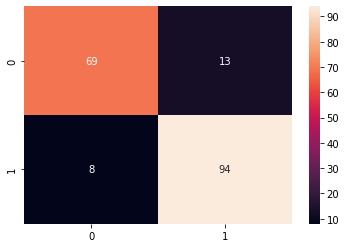

In [34]:
X = heart_df.loc[:, heart_df.columns != "HeartDisease"]
X = (X - np.min(X)) / (np.max(X) - np.min(X))
#define y as heart_disease
y = heart_df['HeartDisease']
#split data set 80 percent train: 20 percent test




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)
#scales down x_values
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x.transform(X_test)


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
gnb = GaussianNB(priors=None, var_smoothing=1e-06)
#fit object model
gnb.fit(x_train, y_train)
# GaussianNB(priors=None, var_smoothing= 1)
y_pred = gnb.predict(x_test)
#print("Naive Bayes score: ",gnb.score(X_test, y_test))#
#print("Number of mislabeled points out of a total %d points : %d"


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
scores['NAIVEBAYES'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['NAIVEBAYES'])
print("Naive Bayes score: ",gnb.score(x_test, y_test))

{'accuracy': 0.8804347826086957, 'precision': 0.8853503184713376, 'recall': 0.9025974025974026, 'f1_score': 0.8938906752411576}


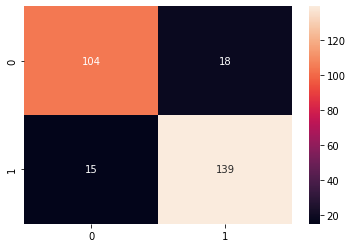

In [33]:
mdl = svc()
param_grid = {"C": [.1, 1, 10, 100, 1000], 'gamma': [.1, 1, 10, 100, 1000], 'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(mdl, param_grid = param_grid, cv = 5)
grid_search.fit(x_train, y_train)
svc_best = grid_search.best_estimator_
y_pred = svc_best.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
scores['SVC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['SVC'])


In [35]:
scores_df = pd.DataFrame(scores)

,metrics,Adaboost,knn_grid,knn,LOGISTICREGRESSION,mlp,CNN,DTC_GRID,DTC,RF_Grid,rf,NAIVEBAYES,SVC
accuracy,accuracy,0.884058,0.862319,0.887681,0.855072,0.844203,0.865942,0.862319,0.815217,0.815217,0.894928,0.855072,0.880435
precision,precision,0.896104,0.886667,0.907285,0.895833,0.844203,0.882353,0.876623,0.860140,0.860140,0.903226,0.890411,0.885350
recall,recall,0.896104,0.863636,0.889610,0.837662,0.844203,0.876623,0.876623,0.798701,0.798701,0.909091,0.844156,0.902597
f1_score,f1_score,0.896104,0.875000,0.898361,0.865772,0.844203,0.879479,0.876623,0.828283,0.828283,0.906149,0.866667,0.893891


In [39]:
import plotly.graph_objects as go

scores_df = pd.DataFrame(scores)
scores_df = round(scores_df, 2)

data = []
for column in scores_df.columns:
    data.append(scores_df[column].tolist())
    
fig = go.Figure(data=[go.Table(header=dict(values=list(scores_df.columns)),
                 cells=dict(values=data))
                     ])
fig.show()
fig.write_html("visualizations/scores.html")


In [185]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.08695652173913043


<AxesSubplot:>

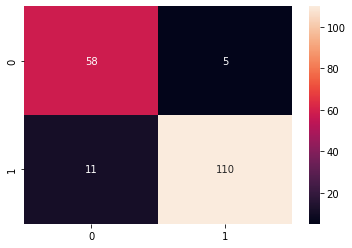

In [186]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

A random forest classifier is an ensemble of decision trees that work together to classify data. Each decision tree in the random forest individually classifies the data, and the outcome with the most votes becomes the final outcome of the model. I used randomized cv to find the best hyperparameters for the model. The max number of estimators is 67, the max depth is 90, and the model has an accuracy of 0.89, which is greater than an individual decision tree. 



In [176]:
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)
scores['RFC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['RFC'])

0.8913043478260869 0.9316239316239316 0.9008264462809917 0.9159663865546218
{'accuracy': 0.8913043478260869, 'precision': 0.9316239316239316, 'recall': 0.9008264462809917, 'f1_score': 0.9159663865546218}


In [0]:
param_grid = {'n_estimators': range(1, 101), 'max_depth': range(1, 101)}
gs = RandomizedSearchCV(RFC(),param_grid)
gs.fit(x_train, y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 101),
                                        'n_estimators': range(1, 101)})

In [179]:
gs.best_params_

{'n_estimators': 67, 'max_depth': 90}

In [180]:
gs.best_score_

0.8651383841207714